## Problem definition
How do economical factors influence health across countries?

## Data acquisition
- Economic factors data: agriculture_gdp_pct, industry_gdp_pct, services_gdp_pct
- Demographic factors data: under_five_mortality_rate, urban_population_pct, life_expectancy_at_birth
- Direct factors data: carbon_dioxide_emissions_per_capita
- Indirect factors data: coal_consumption_per_capita, electricity_consumption_per_capita, total_health_expenditure_gdp_pct <br><br>



Source: [Gapminder](https://www.gapminder.org)

## Data selection motivation
- agriculture, industry and services corespond to the three main economic sectors
- children mortatlity is a key demographic indicator and an important measurer of health state on the entire population
- people's life expectancy is an important demographic factor to determine the quality of life
- air quality directly affects the people's health
- assume that coal consumption indireclty affects health trough harmful emmisions as a result of their burning
- assume that electricity consumption indirectly affects health because it depends mostly on coal which probably increase coal consumption and carbon dioxide emissions respectively
- assume that the percent of urban population affects health with much carbon emissions from one side and better healh providing from the other
- assume that more expenditure for healthcare improves health in general

## Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read, tidy,  clean and validate data

In [3]:
# change country column name
def rename_country_column(dataframe):
    dataframe.columns.values[0] = "country"
    
    return dataframe

In [4]:
# convert year to numeric type
def convert_year_column(dataframe):
    dataframe['year'] = dataframe['year'].astype(int)
    
    return dataframe

In [5]:
# melt dataframe to the desired columns
def melt_data(dataframe, column_name):
    dataframe = pd.melt(dataframe,
        id_vars = ["country"],
        var_name = "year",
        value_name = column_name)
                        
    return dataframe

In [6]:
# merge multiple df on specified keys
def merge_datasets(dataframes):
    merge_keys = ['country', 'year']
    
    # first element is the left df
    merged = dataframes[0].copy()
    
    # the rest are the right df
    dataframes.pop(0)
    
    for df in dataframes:
        merged = merged.merge(df, on = merge_keys, sort = True)
    
    return merged

In [7]:
# remove rows where all features are not presented, reset index
def drop_na(dataframe, columns):
    #columns = ['agriculture', 'industry', 'services']
    dataframe.dropna(subset = columns, how = 'all', inplace = True)
    dataframe.reset_index(drop = True, inplace = True)
    
    return dataframe

In [8]:
# plot line plot
def show_line_plot(y_label, title):
    plt.xlabel("Years")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    plt.show()

 - ### Process agriculture_gdp_pct (% of GDP)

In [9]:
agro_data = pd.read_excel("data/agriculture_gdp_pct.xlsx")
agro_data.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


In [10]:
agro_data = rename_country_column(agro_data)
agro_data = melt_data(agro_data, "agriculture")
agro_data = convert_year_column(agro_data)
agro_data.head()

,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


- ### Process industry_gdp_pct (% of GDP)

In [11]:
industry_data = pd.read_excel("data/industry_gdp_pct.xlsx")
industry_data.head()

,"Industry, value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
industry_data = rename_country_column(industry_data)
industry_data = melt_data(industry_data, "industry")
industry_data = convert_year_column(industry_data)
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


- ### Process services_gdp_pct (% of GDP)

In [13]:
services_data = pd.read_excel("data/services_gdp_pct.xlsx")
services_data.head()

,"Services, etc., value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
services_data = rename_country_column(services_data)
services_data = melt_data(services_data, "services")
services_data = convert_year_column(services_data)
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


In [15]:
agro_data.info(); industry_data.info(); services_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13770 entries, 0 to 13769
Data columns (total 3 columns):
country        13770 non-null object
year           13770 non-null int64
agriculture    6361 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 322.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null int64
industry    6349 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 259.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null int64
services    6311 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 259.7+ KB


In [16]:
# combine dataframes related to economics into one
economy_data = merge_datasets([agro_data, industry_data, services_data])
economy_data.shape

(10251, 5)

In [17]:
economy_data

,country,year,agriculture,industry,services
0,Afghanistan,1961,NaN,NaN,NaN
1,Afghanistan,1962,NaN,NaN,NaN
2,Afghanistan,1963,NaN,NaN,NaN
3,Afghanistan,1964,NaN,NaN,NaN
4,Afghanistan,1965,NaN,NaN,NaN
5,Afghanistan,1966,NaN,NaN,NaN
6,Afghanistan,1967,NaN,NaN,NaN
7,Afghanistan,1968,NaN,NaN,NaN
8,Afghanistan,1969,NaN,NaN,NaN
9,Afghanistan,1970,NaN,NaN,NaN


In [18]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10251 entries, 0 to 10250
Data columns (total 5 columns):
country        10251 non-null object
year           10251 non-null int64
agriculture    6055 non-null float64
industry       5993 non-null float64
services       5955 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 480.5+ KB


In [19]:
# remove rows where all of the three features are not presented
economy_data = drop_na(economy_data, columns = ['agriculture', 'industry', 'services'])
economy_data.shape

(6169, 5)

In [20]:
economy_data.head(10)

,country,year,agriculture,industry,services
0,Afghanistan,2002,45.158479,19.722679,35.118842
1,Afghanistan,2003,46.013843,18.650846,35.335311
2,Afghanistan,2004,41.594103,23.358852,35.047044
3,Afghanistan,2005,39.480416,25.275687,35.243897
4,Afghanistan,2006,32.589058,28.204721,39.206221
5,Afghanistan,2007,34.494833,25.818468,39.686699
6,Afghanistan,2008,28.134488,25.978376,45.887136
7,Afghanistan,2009,31.177550,21.214793,47.607657
8,Afghanistan,2010,29.915323,22.167053,47.917623
9,Albania,1980,33.600206,44.999999,21.399794


In [21]:
# count the rest NaNs in df
economy_data.isnull().sum()

country          0
year             0
agriculture    114
industry       176
services       214
dtype: int64

In [22]:
# fill NaN values with the mean value of each column
economy_data.agriculture.fillna(economy_data.agriculture.dropna().mean(), inplace = True)
economy_data.industry.fillna(economy_data.industry.dropna().mean(), inplace = True)
economy_data.services.fillna(economy_data.services.dropna().mean(), inplace = True)

economy_data.shape

(6169, 5)

In [23]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 5 columns):
country        6169 non-null object
year           6169 non-null int64
agriculture    6169 non-null float64
industry       6169 non-null float64
services       6169 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 241.1+ KB


In [59]:
economy_grouped = economy_data.groupby('year')['agriculture', 'industry', 'services'].mean()

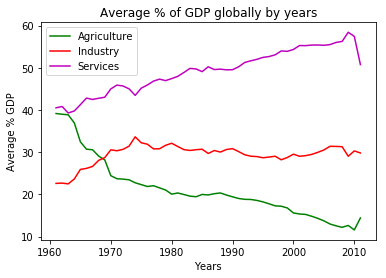

In [78]:
plt.plot(economy_grouped.index, economy_grouped.agriculture.values, color = 'g', label = "Agriculture")
plt.plot(economy_grouped.index, economy_grouped.industry.values, color = 'r', label = "Industry")
plt.plot(economy_grouped.index, economy_grouped.services.values, color = 'm', label = "Services")

show_line_plot('Average % GDP', 'Average % of GDP globally by years')

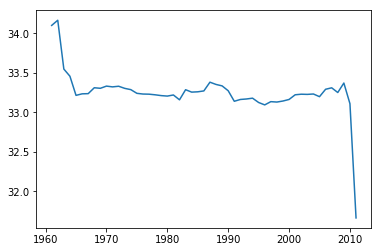

In [94]:

plt.plot(economy_grouped.mean(axis = 1))
plt.show()

In [93]:
economy_grouped

,agriculture,industry,services
year,,,
1961,39.167374,22.607474,40.521288
1962,38.990707,22.674279,40.827627
1963,38.862941,22.491458,39.287135
1964,36.943178,23.653503,39.772137
1965,32.457603,25.919719,41.266663
1966,30.711614,26.165989,42.824225
1967,30.580065,26.625947,42.502883
1968,29.080933,28.067840,42.783660
1969,28.180411,28.705924,43.025461


- ### Process carbon_dioxide_emissions_per_capita (metric tons of CO2 per capita)

In [27]:
carbon_data = pd.read_excel("data/carbon_dioxide_emissions_per_capita.xlsx")
carbon_data.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [28]:
carbon_data = rename_country_column(carbon_data)
carbon_data = melt_data(carbon_data, "carbon_dioxide")
carbon_data = convert_year_column(carbon_data)
carbon_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


- ### Process coal_consumption_per_capita (tonnes oil equivalent per capita)

In [29]:
coal_data = pd.read_excel("data/coal_consumption_per_capita.xlsx")
coal_data.head()

,Coal Consumption per person (tonnes oil equivalent),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.005871,0.00556,0.004136,0.004249,0.005248,0.006038,0.002118,0.002055,0.001993,...,0.019019,0.01877,0.018737,0.016784,0.017459,0.017047,0.016789,0.005494,NaN,NaN


In [30]:
coal_data = rename_country_column(coal_data)
coal_data = melt_data(coal_data, 'coal_consumption')
coal_data = convert_year_column(coal_data)
coal_data.head()

,country,year,coal_consumption
0,Abkhazia,1965,NaN
1,Afghanistan,1965,NaN
2,Akrotiri and Dhekelia,1965,NaN
3,Albania,1965,NaN
4,Algeria,1965,0.005871


No handles with labels found to put in legend.


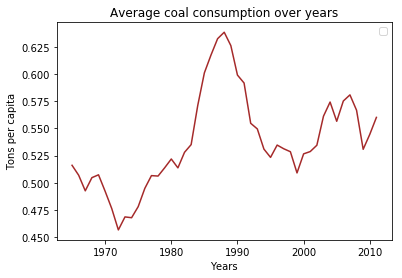

In [31]:
coal_cons_by_year = coal_data.groupby('year')['coal_consumption'].mean()
plt.plot(coal_cons_by_year.index, coal_cons_by_year.values, color = 'brown')
show_line_plot("Tons per capita", "Average coal consumption over years")

- ### Process electricity_consumption_per_capita (kWh per capita)

In [32]:
electricity_data = pd.read_excel('data/electricity_consumption_per_capita.xlsx')
electricity_data.head()

,"Electricity consumption, per capita (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1459.433092,1378.656751,1691.749604,1622.587317,1146.694855,1137.949266,1510.482138,1706.976899,1800.870627,2021.634918
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.702866,768.798600,785.622933,869.352620,840.780713,870.586163,920.914005,841.320010,986.865004,1090.565936


In [33]:
electricity_data = rename_country_column(electricity_data)
electricity_data = melt_data(electricity_data, 'electricity_consumption')
electricity_data = convert_year_column(electricity_data)
electricity_data.head()

,country,year,electricity_consumption
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,NaN


No handles with labels found to put in legend.


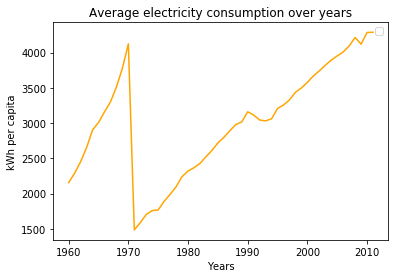

In [34]:
el_cons_by_year = electricity_data.groupby('year')['electricity_consumption'].mean()
plt.plot(el_cons_by_year.index, el_cons_by_year.values, color = 'orange')
show_line_plot("kWh per capita", "Average electricity consumption over years")

- ### Process urban_population_pct (% of total)

In [35]:
urban_pop_data = pd.read_excel("data/urban_population_pct.xlsx")
urban_pop_data.head()

,Urban population (% of total),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,8.0,8.2650,8.5370,8.8090,9.0810,9.353,9.6886,10.0242,10.3598,...,21.1026,21.3624,21.6222,21.882,22.1534,22.4248,22.6962,22.9676,23.239,23.5472
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.7,30.8100,30.9150,31.0200,31.1250,31.230,31.3320,31.4340,31.5360,...,43.7662,44.7788,45.7914,46.804,47.9076,49.0112,50.1148,51.2184,52.322,53.3846
4,Algeria,30.5,31.9366,33.3632,34.7898,36.2164,37.643,38.0144,38.3858,38.7572,...,63.1478,64.3282,65.5086,66.689,67.7560,68.8230,69.8900,70.9570,72.024,72.8650


In [36]:
urban_pop_data = rename_country_column(urban_pop_data)
urban_pop_data = melt_data(urban_pop_data, 'urban_percent')
urban_pop_data  = convert_year_column(urban_pop_data)
urban_pop_data.head()

,country,year,urban_percent
0,Abkhazia,1960,NaN
1,Afghanistan,1960,8.0
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,30.7
4,Algeria,1960,30.5


No handles with labels found to put in legend.


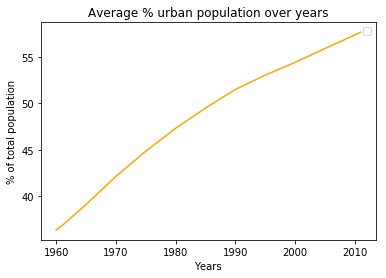

In [37]:
urban_pop_by_year = urban_pop_data.groupby('year')['urban_percent'].mean()
plt.plot(urban_pop_by_year.index, urban_pop_by_year.values, color = 'orange')
show_line_plot("% of total population", "Average % urban population over years")

- ### Process life_expectancy_at_birth (years)

In [38]:
life_exp_data = pd.read_excel('data/life_expectancy_at_birth.xlsx')
life_exp_data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [39]:
life_exp_data = rename_country_column(life_exp_data)
life_exp_data = melt_data(life_exp_data, 'life_expectancy')
life_exp_data = convert_year_column(life_exp_data)
life_exp_data.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


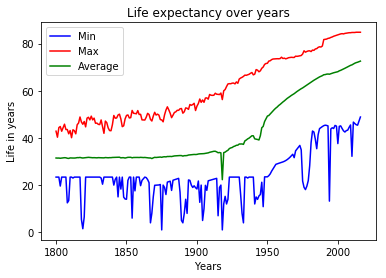

In [40]:
life_exp_by_year = life_exp_data.groupby('year')['life_expectancy']

plt.plot(life_exp_by_year.min().index, life_exp_by_year.min().values, color = 'blue', label = "Min")
plt.plot(life_exp_by_year.max().index, life_exp_by_year.max().values, color = 'red', label = "Max")
plt.plot(life_exp_by_year.mean().index, life_exp_by_year.mean().values, color = 'green', label = "Average")

show_line_plot("Life in years", "Life expectancy over years")

In [41]:
life_exp_data.year.min()

1800

- ### Process under_five_mortality_rate (per 1,000 live births)

In [42]:
under_five_mortality_data = pd.read_excel('data/under_five_mortality_rate.xlsx')
under_five_mortality_data.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


In [43]:
under_five_mortality_data = rename_country_column(under_five_mortality_data)
under_five_mortality_data = melt_data(under_five_mortality_data, 'under_five_mortality_rate')
under_five_mortality_data = convert_year_column(under_five_mortality_data)
under_five_mortality_data.head()

,country,year,under_five_mortality_rate
0,Afghanistan,1931,NaN
1,Albania,1931,NaN
2,Algeria,1931,NaN
3,Andorra,1931,NaN
4,Angola,1931,NaN


No handles with labels found to put in legend.


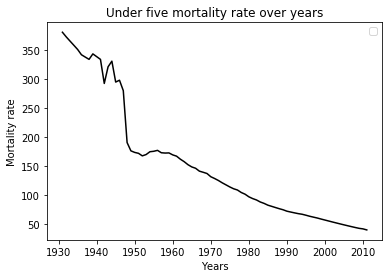

In [44]:
under_five_by_year = under_five_mortality_data.groupby('year')['under_five_mortality_rate'].mean()
plt.plot(under_five_by_year.index, under_five_by_year.values, color = 'black')
show_line_plot("Mortality rate", "Under five mortality rate over years")

- ### Process total_health_expenditure_gdp_pct (% of GDP)

In [45]:
health_exp_data = pd.read_excel('data/total_health_expenditure_gdp_pct.xlsx')
health_exp_data.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


In [46]:
health_exp_data = rename_country_column(health_exp_data)
health_exp_data = melt_data(health_exp_data, 'health_expenditure')
health_exp_data = convert_year_column(health_exp_data)
health_exp_data.head()

,country,year,health_expenditure
0,Abkhazia,1995,NaN
1,Afghanistan,1995,NaN
2,Akrotiri and Dhekelia,1995,NaN
3,Albania,1995,2.559558
4,Algeria,1995,4.173543


No handles with labels found to put in legend.


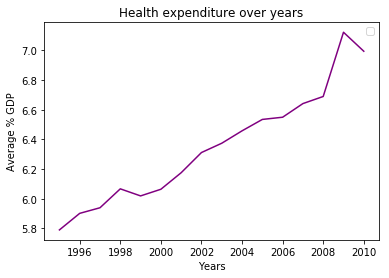

In [47]:
health_exp_by_year = health_exp_data.groupby('year')['health_expenditure'].mean()
plt.plot(health_exp_by_year.index, health_exp_by_year.values, color = 'purple')
show_line_plot("Average % GDP", "Health expenditure over years")

### General conslusions after visualizations:

- economics increases % GDP over the years


In [48]:
health_exp_data.health_expenditure.mean()

6.351125389496548

In [49]:
expenditure_by_countries = health_exp_data.groupby(['country'])['health_expenditure'].mean()
expenditure_by_countries

country
Abkhazia                          NaN
Afghanistan                  6.859733
Akrotiri and Dhekelia             NaN
Albania                      5.933032
Algeria                      3.780396
American Samoa                    NaN
Andorra                      7.585267
Angola                       2.677951
Anguilla                          NaN
Antigua and Barbuda          4.723537
Argentina                    8.597615
Armenia                      5.244163
Aruba                             NaN
Australia                    8.146518
Austria                     10.143237
Azerbaijan                   5.709248
Bahamas                      6.987215
Bahrain                      4.292721
Bangladesh                   3.163642
Barbados                     6.667995
Belarus                      6.336819
Belgium                      9.071532
Belize                       4.374732
Benin                        4.483733
Bermuda                           NaN
Bhutan                       5.500206
Boli

In [50]:
all_data = merge_datasets([economy_data, coal_data, electricity_data, carbon_data, under_five_mortality_data, urban_pop_data, life_exp_data, health_exp_data])
all_data.head()

,country,year,agriculture,industry,services,coal_consumption,electricity_consumption,carbon_dioxide,under_five_mortality_rate,urban_percent,life_expectancy,health_expenditure
0,Afghanistan,2002,45.158479,19.722679,35.118842,NaN,NaN,0.014583,129.2,21.1026,51.0,5.716590
1,Afghanistan,2003,46.013843,18.650846,35.335311,NaN,NaN,0.022704,125.9,21.3624,51.4,6.819749
2,Afghanistan,2004,41.594103,23.358852,35.047044,NaN,NaN,0.027472,122.7,21.6222,51.8,6.356457
3,Afghanistan,2005,39.480416,25.275687,35.243897,NaN,NaN,0.036780,119.4,21.8820,52.0,6.630313
4,Afghanistan,2006,32.589058,28.204721,39.206221,NaN,NaN,0.047090,116.3,22.1534,52.1,6.769914


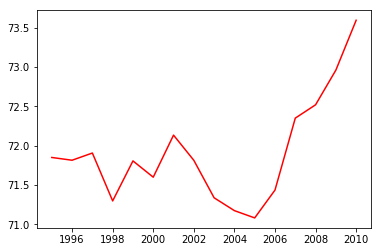

In [51]:
mean_expenditure = all_data.health_expenditure.mean()
most_expenditers = all_data[all_data.health_expenditure > mean_expenditure]
h = most_expenditers.groupby('year')['health_expenditure'].mean()
l = most_expenditers.groupby('year')['life_expectancy'].mean()

#plt.plot(h.index, h.values, color = 'g', label = "Expendityre")
plt.plot(l.index, l.values, color = 'r', label = "Life expectancy")
plt.show()

In [52]:
tt = test.groupby('year')['coal_consumption'].mean()
tr = test.groupby('year')['carbon_dioxide'].mean()

NameError: name 'test' is not defined

In [ ]:
plt.plot(tt.index, tt.values, color = 'g', label = "Agriculture")
plt.plot(tr.index, tr.values, color = 'r', label = "Agriculture")
plt.show()

In [ ]:
all_data.shape

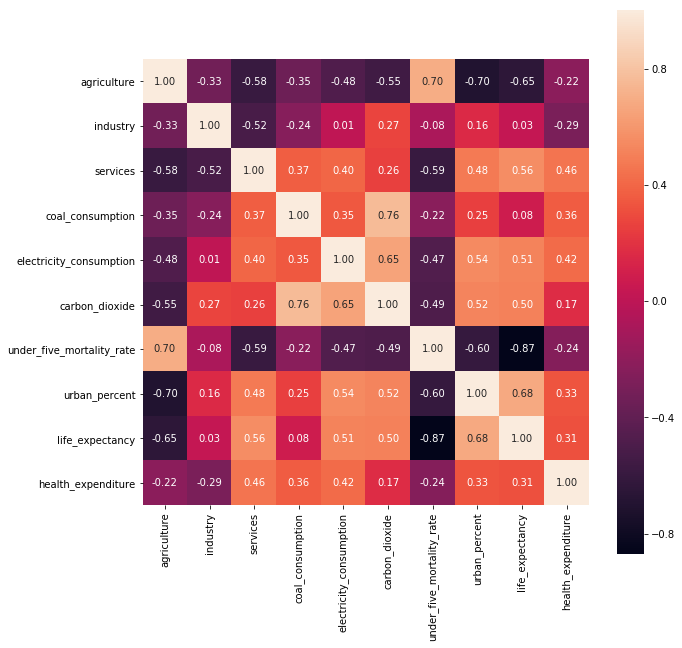

In [95]:
# show correlations
plt.figure(figsize = (10, 10))
sns.heatmap(all_data.drop('year', axis = 1).corr(), annot = True, fmt = ".2f", square = True)

plt.show()